#### Importing Libraries

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

#### Load the Dataset

I will import the dataset with the usual *pandas read_excel()* function which is used to import Excel files.

In [3]:
df = pd.read_excel(r"C:\Users\sivak\Excel_files\Assessment_Data.xlsx")
df

,firstName,lastName,updatedOn,assessmentTitle,assessmentID,totalNumberQuestions,questionsDone,overallScore,GRADE
0,Little Jimmy,Jr.,2023-11-27 16:40:13.329,Interpreting the weather,NaN,0,0,0.000000,1
1,Learnt,Africa,2023-08-07 08:46:48.538,Basic Addition Part One,NaN,0,0,0.000000,1
2,Collins,Kesuibai,2023-07-06 16:51:03.625,Morning Greetings,NaN,0,0,0.000000,1
3,Learnt,Africa,2022-04-22 20:19:30.877,NaN,e2qxi19gMDjRHzmJ0EuJ,2,2,1.000000,1
4,Mark,Moriama,2022-04-22 21:48:30.971,NaN,WQIiM5iXz8tqUwyi6n1K,2,2,0.500000,1
...,...,...,...,...,...,...,...,...,...
90,Collins,Kesuibai,2022-08-24 18:35:11.584,Counting Numbers 1-10,N6EFBOe2aCeglrUR2qUy,7,11,1.800000,1
91,Learnt,Africa,2023-12-27 10:57:42.419,Counting Numbers 20 - 30,N6EFBOe2aCeglrUR2qUy,7,7,1.000000,1
92,Learnt,Africa,2024-05-05 14:44:12.761,Counting Numbers 1-10,N6EFBOe2aCeglrUR2qUy,7,7,1.000000,1
93,Mark,Moriama,2022-06-20 10:07:53.693,Counting Numbers 1-10,N6EFBOe2aCeglrUR2qUy,7,7,0.571429,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   firstName             95 non-null     object        
 1   lastName              94 non-null     object        
 2   updatedOn             95 non-null     datetime64[ns]
 3   assessmentTitle       93 non-null     object        
 4   assessmentID          92 non-null     object        
 5   totalNumberQuestions  95 non-null     int64         
 6   questionsDone         95 non-null     int64         
 7   overallScore          95 non-null     float64       
 8   GRADE                 95 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 6.8+ KB


In [4]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
updatedOn,95,2023-02-24 04:12:37.536368640,2022-02-26 17:39:38.894000,2022-08-17 12:53:12.436499968,2023-01-31 19:37:32.780000,2023-08-07 09:53:16.767500032,2024-06-18 21:11:04.815000,NaN
totalNumberQuestions,95.0,4.968421,0.0,5.0,5.0,5.0,7.0,1.215613
questionsDone,95.0,4.810526,0.0,1.0,5.0,5.0,26.0,4.767565
overallScore,95.0,0.660226,0.0,0.0,0.6,1.0,3.6,0.680255
GRADE,95.0,1.326316,1.0,1.0,1.0,1.0,3.0,0.706235


In [5]:
df.isna().sum()

firstName               0
lastName                1
updatedOn               0
assessmentTitle         2
assessmentID            3
totalNumberQuestions    0
questionsDone           0
overallScore            0
GRADE                   0
dtype: int64

In [6]:
assess_ID_mode = df["assessmentID"].mode()[0]
assess_Title_mode = df["assessmentTitle"].mode()[0]
print(f'Mode of assessmentID:',assess_ID_mode)
print(f'Mode of assessmentTitle :',assess_Title_mode)

Mode of assessmentID: 0E7Fgx1qjpJDEPG227TM
Mode of assessmentTitle : Morning Greetings


In [7]:
df["assessmentID"] = df["assessmentID"].fillna(assess_ID_mode)
df["assessmentTitle"] = df["assessmentTitle"].fillna(assess_Title_mode)
df["lastName"] = df["lastName"].fillna("NA")

In [8]:
df['updatedOn'] = pd.to_datetime(df['updatedOn']).dt.date

In [9]:
df.isna().sum()

firstName               0
lastName                0
updatedOn               0
assessmentTitle         0
assessmentID            0
totalNumberQuestions    0
questionsDone           0
overallScore            0
GRADE                   0
dtype: int64

In [10]:
df

,firstName,lastName,updatedOn,assessmentTitle,assessmentID,totalNumberQuestions,questionsDone,overallScore,GRADE
0,Little Jimmy,Jr.,2023-11-27,Interpreting the weather,0E7Fgx1qjpJDEPG227TM,0,0,0.000000,1
1,Learnt,Africa,2023-08-07,Basic Addition Part One,0E7Fgx1qjpJDEPG227TM,0,0,0.000000,1
2,Collins,Kesuibai,2023-07-06,Morning Greetings,0E7Fgx1qjpJDEPG227TM,0,0,0.000000,1
3,Learnt,Africa,2022-04-22,Morning Greetings,e2qxi19gMDjRHzmJ0EuJ,2,2,1.000000,1
4,Mark,Moriama,2022-04-22,Morning Greetings,WQIiM5iXz8tqUwyi6n1K,2,2,0.500000,1
...,...,...,...,...,...,...,...,...,...
90,Collins,Kesuibai,2022-08-24,Counting Numbers 1-10,N6EFBOe2aCeglrUR2qUy,7,11,1.800000,1
91,Learnt,Africa,2023-12-27,Counting Numbers 20 - 30,N6EFBOe2aCeglrUR2qUy,7,7,1.000000,1
92,Learnt,Africa,2024-05-05,Counting Numbers 1-10,N6EFBOe2aCeglrUR2qUy,7,7,1.000000,1
93,Mark,Moriama,2022-06-20,Counting Numbers 1-10,N6EFBOe2aCeglrUR2qUy,7,7,0.571429,1


## Exploratory Data Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   firstName             95 non-null     object 
 1   lastName              95 non-null     object 
 2   updatedOn             95 non-null     object 
 3   assessmentTitle       95 non-null     object 
 4   assessmentID          95 non-null     object 
 5   totalNumberQuestions  95 non-null     int64  
 6   questionsDone         95 non-null     int64  
 7   overallScore          95 non-null     float64
 8   GRADE                 95 non-null     int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 6.8+ KB


#### Check the data types of columns 
The above df.info() command gives us the number of filled values along with the data types of columns.

If we simply want to check the data type of a particular column, we can use the following command.

In [12]:
df.dtypes

firstName                object
lastName                 object
updatedOn                object
assessmentTitle          object
assessmentID             object
totalNumberQuestions      int64
questionsDone             int64
overallScore            float64
GRADE                     int64
dtype: object

### Statistical properties of dataset

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
totalNumberQuestions,95.0,4.968421,1.215613,0.0,5.0,5.0,5.0,7.0
questionsDone,95.0,4.810526,4.767565,0.0,1.0,5.0,5.0,26.0
overallScore,95.0,0.660226,0.680255,0.0,0.0,0.6,1.0,3.6
GRADE,95.0,1.326316,0.706235,1.0,1.0,1.0,1.0,3.0


Total Number of Questions(totalNumberQuestions):
- The average number of questions attempted is approximately 5 (mean = 4.97)
- The standard deviation suggests some variability around this average (std = 1.22)

Questions Done (questionsDone):
- On average, participants completed around 4.81 questions.
- This indicates that not all participants attempted all questions.

Overall Score (overallScore):
- The mean overall score is quite low at 0.66.t    
- Participants may have faced challenging questions or performed poorly on average.

GRADE:
- The mean GRADE score is 1.33.
- Higher GRADE scores likely correspond to better performance.

In [14]:
average_score = df["overallScore"].mean()
print(f"Average overall score: {average_score:.2f}")

# Identify common themes
common_themes = df["assessmentTitle"].mode().tolist()
print(f"Common assessment themes: {', '.join(common_themes)}")

Average overall score: 0.66
Common assessment themes: Morning Greetings


In [15]:
df["GRADE"].value_counts()

GRADE
1    77
3    13
2     5
Name: count, dtype: int64

In [16]:
df["overallScore"].unique()

array([0.        , 1.        , 0.5       , 0.75      , 2.        ,
       0.8       , 0.2       , 0.4       , 0.6       , 1.8       ,
       2.6       , 3.6       , 1.6       , 2.4       , 0.83333333,
       1.16666667, 0.66666667, 1.5       , 0.57142857])

In [17]:
grouped_data=df.groupby(['assessmentID','assessmentTitle'])['firstName'].unique().reset_index()
grouped_data

,assessmentID,assessmentTitle,firstName
0,0E7Fgx1qjpJDEPG227TM,Basic Addition Part One,[Learnt]
1,0E7Fgx1qjpJDEPG227TM,Interpreting the weather,[Little Jimmy]
2,0E7Fgx1qjpJDEPG227TM,Morning Greetings,"[Collins, Learnt, Stacy, Mark, a, Irators, She..."
3,4vTSrHYFVr6UwtYXEwK5,Counting Numbers 20 - 30,"[Mark, Irators, Learnt, Collins, a, Keren, Joash]"
4,8p01Q42Ym2zOf6bzPgcu,Evening Greetings,"[Learnt, Mark, Irators, Keren, Collins, Joash ..."
5,Alzexl3RWXOY46tdgRAH,Counting Numbers 10 - 20,"[Keren, Collins, Learnt, Mark, Moripesh, Wei, ..."
6,CKf1KK4cNxqU6o5gCTaH,Environmental Studies,"[Mark, Learnt, Little Jimmy, Joash Olum, Collins]"
7,N6EFBOe2aCeglrUR2qUy,Counting Numbers 1-10,"[Mark, Irators, Collins, Learnt, Joash]"
8,N6EFBOe2aCeglrUR2qUy,Counting Numbers 20 - 30,[Learnt]
9,RdcKXGsngbZJGa8ZbTq5,Alphabets Lesson 1 (A-M),"[Learnt, Mark, Kubrate, Joash, Keren, Collins,..."


In [18]:
grouped_data['num_persons'] = grouped_data['firstName'].apply(len)
filtered_df = grouped_data[grouped_data['num_persons'] > 2]
filtered_df


,assessmentID,assessmentTitle,firstName,num_persons
2,0E7Fgx1qjpJDEPG227TM,Morning Greetings,"[Collins, Learnt, Stacy, Mark, a, Irators, She...",11
3,4vTSrHYFVr6UwtYXEwK5,Counting Numbers 20 - 30,"[Mark, Irators, Learnt, Collins, a, Keren, Joash]",7
4,8p01Q42Ym2zOf6bzPgcu,Evening Greetings,"[Learnt, Mark, Irators, Keren, Collins, Joash ...",6
5,Alzexl3RWXOY46tdgRAH,Counting Numbers 10 - 20,"[Keren, Collins, Learnt, Mark, Moripesh, Wei, ...",7
6,CKf1KK4cNxqU6o5gCTaH,Environmental Studies,"[Mark, Learnt, Little Jimmy, Joash Olum, Collins]",5
7,N6EFBOe2aCeglrUR2qUy,Counting Numbers 1-10,"[Mark, Irators, Collins, Learnt, Joash]",5
9,RdcKXGsngbZJGa8ZbTq5,Alphabets Lesson 1 (A-M),"[Learnt, Mark, Kubrate, Joash, Keren, Collins,...",7
10,T8yaianDtBlAaKB0DsJ0,Courtesy Words,"[Learnt, Mark, Joash Olum]",3
11,VSwwChmNMxKf5lg5FFwJ,Our solar system,"[Kesuibai, Keren, Mark, Shem, Learnt, Collins]",6
12,VgijRlx7AMI3sCXfmsao,Interpreting the weather,"[Learnt, Collins, Mark]",3


In [19]:
grouped_data=df.groupby(['assessmentID','assessmentTitle', 'overallScore'])['firstName'].unique().reset_index()
grouped_data['num_persons'] = grouped_data['firstName'].apply(len)
filtered_df = grouped_data[grouped_data['num_persons'] > 1]
filtered_df

,assessmentID,assessmentTitle,overallScore,firstName,num_persons
2,0E7Fgx1qjpJDEPG227TM,Morning Greetings,0.000000,"[Collins, Learnt, Stacy, a, Mark]",5
3,0E7Fgx1qjpJDEPG227TM,Morning Greetings,0.600000,"[Momanyi, Huy, Joash]",3
4,0E7Fgx1qjpJDEPG227TM,Morning Greetings,0.800000,"[Collins, Irators, Shem, Keren]",4
6,4vTSrHYFVr6UwtYXEwK5,Counting Numbers 20 - 30,0.000000,"[Mark, Irators, Learnt, a]",4
11,8p01Q42Ym2zOf6bzPgcu,Evening Greetings,0.000000,"[Learnt, Mark, Irators, Joash Olum]",4
15,Alzexl3RWXOY46tdgRAH,Counting Numbers 10 - 20,0.800000,"[Wei, Joash Olum]",2
16,Alzexl3RWXOY46tdgRAH,Counting Numbers 10 - 20,1.000000,"[Learnt, Mark, Moripesh]",3
19,CKf1KK4cNxqU6o5gCTaH,Environmental Studies,0.400000,"[Little Jimmy, Joash Olum]",2
22,N6EFBOe2aCeglrUR2qUy,Counting Numbers 1-10,0.000000,"[Irators, Mark]",2
24,N6EFBOe2aCeglrUR2qUy,Counting Numbers 1-10,1.000000,"[Mark, Learnt, Joash]",3


In [20]:
for score in df["GRADE"].unique():
    if score == 1:
        print(f"Grade-1 Score: ")
        print(df.loc[df["GRADE"]==1]["firstName"].unique())
        
    elif score == 2:
        print(f"Grade-2 Score: ")
        print(df.loc[df["GRADE"]==2]["firstName"].unique())

    else:
        print(f"Grade-3 Score: ")
        print(df.loc[df["GRADE"]==3]["firstName"].unique())
    
    print("-"*100)
    print(" ")


Grade-1 Score: 
['Little Jimmy' 'Learnt' 'Collins' 'Mark' 'Shem' 'Stacy' 'Irators'
 'Joash Olum' 'Momanyi' 'Keren' 'Huy' 'Joash' 'Moripesh' 'Kubrate']
----------------------------------------------------------------------------------------------------
 
Grade-2 Score: 
['Kesuibai' 'Collins' 'Wei']
----------------------------------------------------------------------------------------------------
 
Grade-3 Score: 
['Keren' 'Mark' 'a' 'Bontle' 'Anne']
----------------------------------------------------------------------------------------------------
 


In [21]:
grade_1 = df[df['GRADE']== 1]['firstName'].value_counts()
print(f'Students who got Grade-1: \n {grade_1.reset_index()}')
print('*'*50)
grade_2 = df[df['GRADE']== 2]['firstName'].value_counts()
print(f'Students who got Grade-2: \n {grade_2.reset_index()}')
print('*'*50)
grade_3 = df[df['GRADE']== 3]['firstName'].value_counts()
print(f'Students who got Grade-3: \n {grade_3.reset_index()}')

Students who got Grade-1: 
        firstName  count
0         Learnt     18
1           Mark     18
2        Collins     11
3     Joash Olum      7
4        Irators      5
5          Joash      5
6          Keren      4
7   Little Jimmy      2
8           Shem      2
9          Stacy      1
10       Momanyi      1
11           Huy      1
12      Moripesh      1
13       Kubrate      1
**************************************************
Students who got Grade-2: 
   firstName  count
0   Collins      3
1  Kesuibai      1
2       Wei      1
**************************************************
Students who got Grade-3: 
   firstName  count
0     Keren      5
1      Mark      3
2         a      3
3    Bontle      1
4      Anne      1


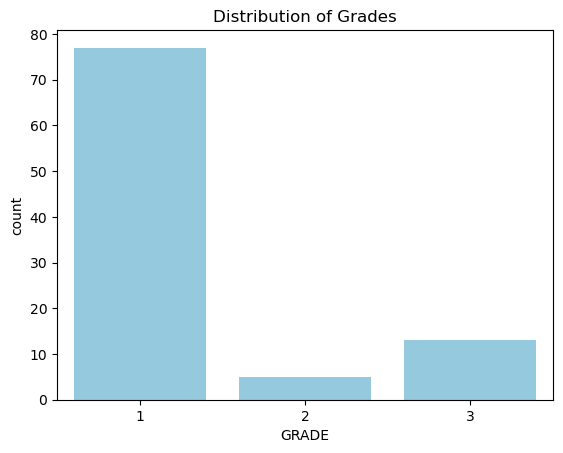

In [22]:
sns.countplot(x='GRADE', data=df, color='skyblue')
plt.title('Distribution of Grades')
plt.show()

There are three bars representing different grades:
- Grade 1: The tallest bar, with a count close to 80.
- Grade 2: A much shorter bar, with a count around 10.
- Grade 3: The shortest bar, indicating a count slightly higher than zero but less than 10.

The distribution seems skewed, with the majority of observations falling into Grade 1.

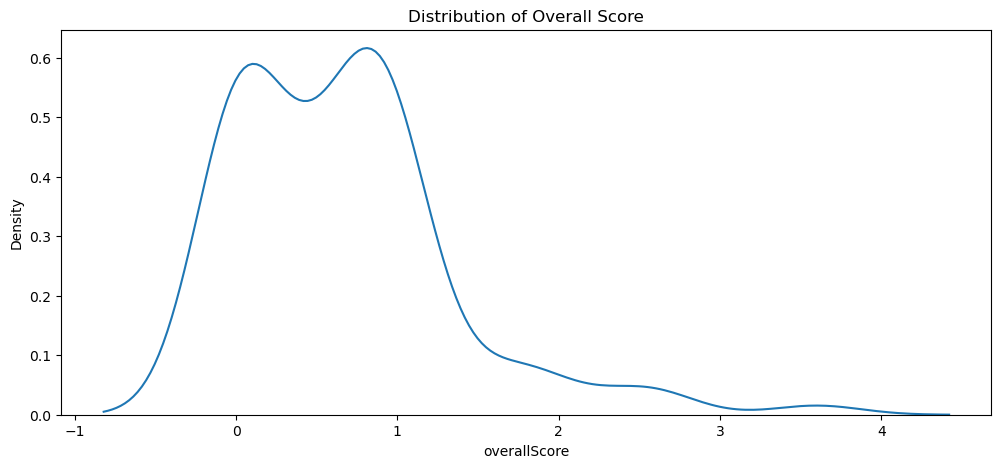

In [23]:
plt.figure(figsize=(12,5))
sns.kdeplot(x=df["overallScore"].round(2), palette=['#153448'])
plt.title('Distribution of Overall Score')
plt.show()

The graph displays the distribution of overall scores, with the horizontal axis representing the overallScore ranging from -1 to 4. The vertical axis represents the Density ranging from 0 to 0.6. Here are some key observations:

**Peak Around 1:**
- The curve peaks slightly before the value 1 on the horizontal axis.
- This suggests that most data points are clustered around an overall score of approximately 1.
- Fewer occurrences of extremely low or high overall scores are observed.

**Tapering Off:**
- As we move away from the peak, the density decreases towards both ends of the scale.
- This indicates that overall scores become less frequent as they deviate from the central value.

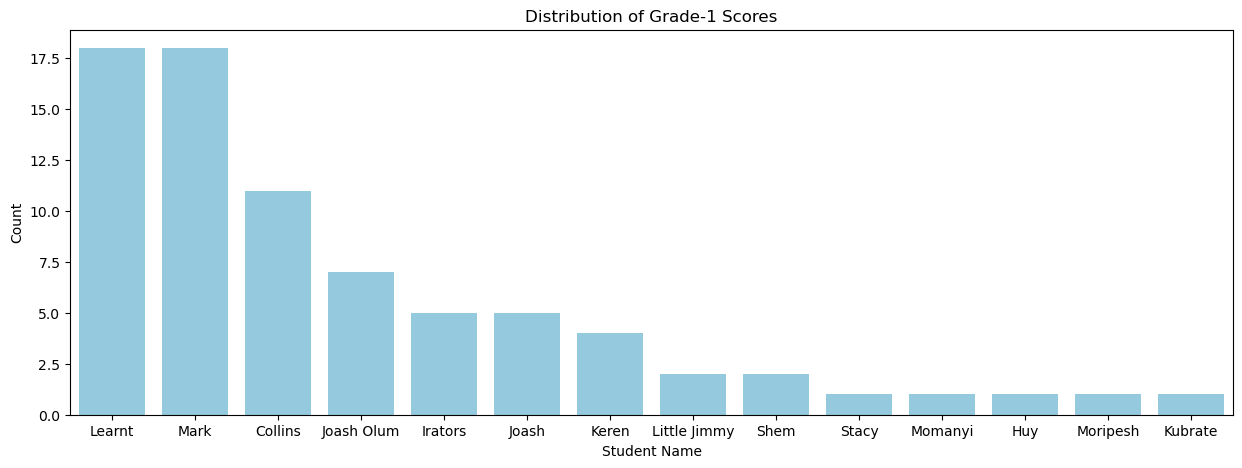

In [24]:
plt.figure(figsize=(15, 5))
sns.barplot(grade_1, color='skyblue')
plt.title('Distribution of Grade-1 Scores')
plt.xlabel('Student Name')
plt.ylabel('Count')
plt.show()

Score Distribution:
- The y-axis represents the “Score” ranging from 0 to 17.5 in increments of 2.5.
- Learnt and Mark has the highest score, exceeding 17.5.
- Momanyi, Huy, Moripesh and Kubrate have the lowest scores, around 2.5.

Variability:
- The distribution appears skewed, with most students clustered around the lower scores.
- This suggests potential variations in student performance.

Potential Implications:
- Consider investigating why some students consistently score higher (e.g., teaching methods, individual effort).
- Address any disparities to improve overall performance.

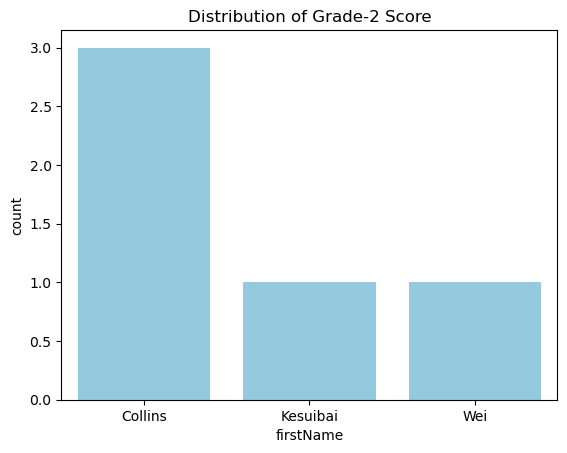

In [25]:
sns.barplot(grade_2, color='skyblue')
plt.title('Distribution of Grade-2 Score')
plt.show()

**Collins:** The bar representing Collins appears significantly higher than the others, suggesting that Collins achieved a higher Grade-2 score. This individual might be a top performer or an outlier in the dataset.

**Kesuibai and Wei:** Both Kesuibai and Wei have lower bars, indicating lower scores. They could represent average or below-average performance.

**Distribution:** The distribution seems skewed, with Collins dominating the higher end. It’s worth investigating why this disparity exists. Factors like study habits, teaching methods, or individual abilities could contribute.

**Further Analysis:** To gain deeper insights, consider examining the spread, variance, and any patterns within each student’s scores. Are there commonalities among high-scoring students? Conversely, what challenges do Kesuibai and Wei face?

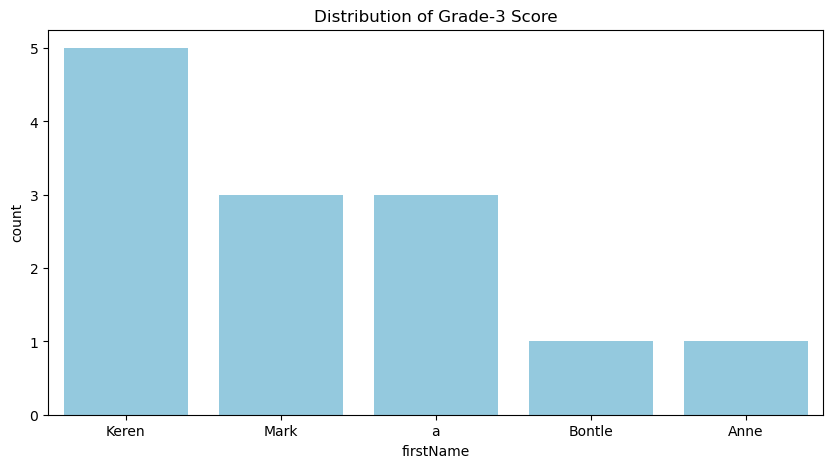

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(grade_3, color='skyblue')
plt.title('Distribution of Grade-3 Score')
plt.show()

Individual Performance:
- Keren has the highest score, with a count of 5.
- Mark and a follow, both having a score of 3.
- Bontle and Anne has the lowest score, with a count of 1.

Observations:
- Keren’s performance stands out, suggesting potential excellence.
- Mark and a are relatively consistent.
Anne’s score warrants further investigation.

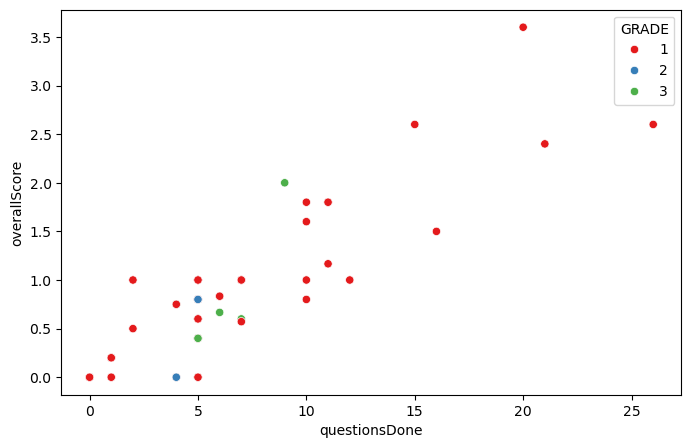

In [27]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["questionsDone"], y=df["overallScore"], hue=df["GRADE"], palette="Set1")
plt.show()

- Grade 3 students seem to have a steeper increase in scores as they complete more questions.
- 
Grade 1 students exhibit a gradual improvement, while Grade 2 students fall in between.

   index          assessmentID      assessmentTitle  overallScore firstName
0     31  oyu0dBlMghrjZYeez5Je  Afternoon Greetings           0.8   Collins
1     45  oyu0dBlMghrjZYeez5Je  Afternoon Greetings           0.8    Learnt
2     46  oyu0dBlMghrjZYeez5Je  Afternoon Greetings           0.8      Mark
3     47  oyu0dBlMghrjZYeez5Je  Afternoon Greetings           0.4         a
4     48  oyu0dBlMghrjZYeez5Je  Afternoon Greetings           1.0      Mark
5     55  oyu0dBlMghrjZYeez5Je  Afternoon Greetings           0.6     Joash


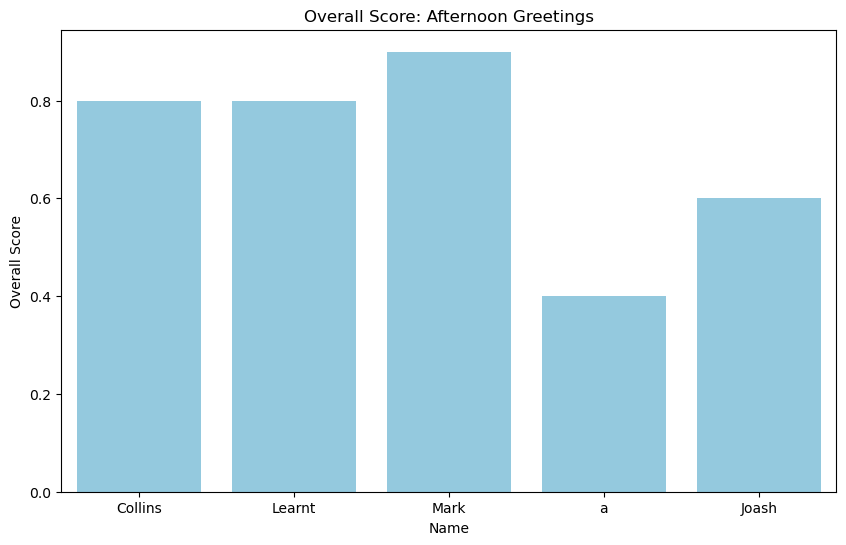

####################################################################################################
   index          assessmentID           assessmentTitle  overallScore  \
0     79  RdcKXGsngbZJGa8ZbTq5  Alphabets Lesson 1 (A-M)      0.833333   
1     80  RdcKXGsngbZJGa8ZbTq5  Alphabets Lesson 1 (A-M)      0.200000   
2     81  RdcKXGsngbZJGa8ZbTq5  Alphabets Lesson 1 (A-M)      0.000000   
3     82  RdcKXGsngbZJGa8ZbTq5  Alphabets Lesson 1 (A-M)      0.000000   
4     83  RdcKXGsngbZJGa8ZbTq5  Alphabets Lesson 1 (A-M)      1.166667   
5     84  RdcKXGsngbZJGa8ZbTq5  Alphabets Lesson 1 (A-M)      0.666667   
6     85  RdcKXGsngbZJGa8ZbTq5  Alphabets Lesson 1 (A-M)      0.833333   
7     86  RdcKXGsngbZJGa8ZbTq5  Alphabets Lesson 1 (A-M)      1.500000   

    firstName  
0      Learnt  
1        Mark  
2     Kubrate  
3      Learnt  
4       Joash  
5       Keren  
6     Collins  
7  Joash Olum  


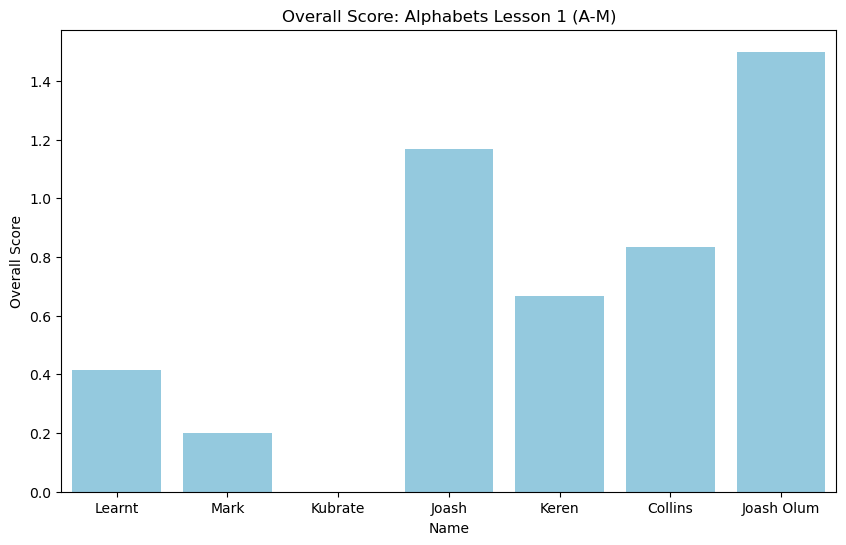

####################################################################################################
   index          assessmentID                            assessmentTitle  \
0     24  a90v3Uu0x5q34ooXov6F  Alphabets Lesson 2 (Upper and Lower Case)   
1     63  a90v3Uu0x5q34ooXov6F  Alphabets Lesson 2 (Upper and Lower Case)   
2     64  a90v3Uu0x5q34ooXov6F  Alphabets Lesson 2 (Upper and Lower Case)   
3     65  a90v3Uu0x5q34ooXov6F  Alphabets Lesson 2 (Upper and Lower Case)   
4     72  a90v3Uu0x5q34ooXov6F  Alphabets Lesson 2 (Upper and Lower Case)   
5     78  a90v3Uu0x5q34ooXov6F  Alphabets Lesson 2 (Upper and Lower Case)   

   overallScore   firstName  
0           0.0     Irators  
1           0.2        Mark  
2           1.0      Learnt  
3           1.0       Keren  
4           1.8     Collins  
5           2.6  Joash Olum  


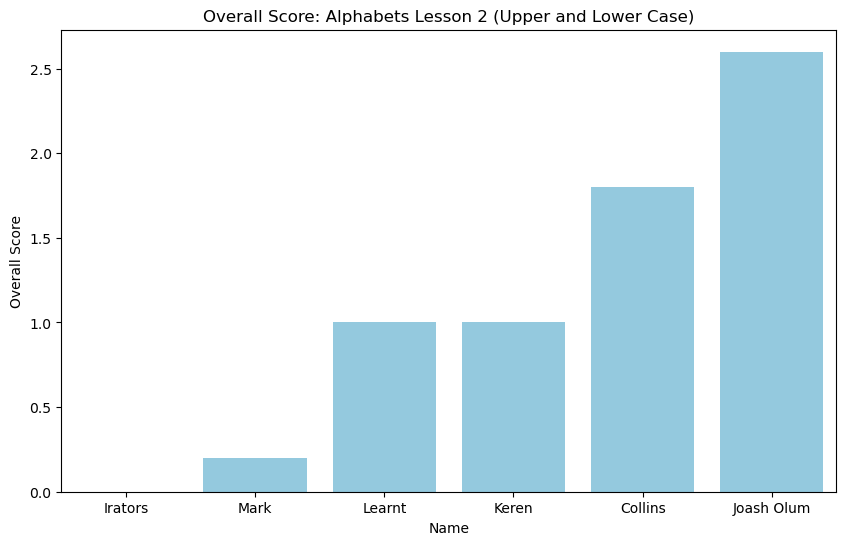

####################################################################################################
   index          assessmentID          assessmentTitle  overallScore  \
0      1  0E7Fgx1qjpJDEPG227TM  Basic Addition Part One           0.0   
1     21  bLqkCyTYkX01bNFO6Psk  Basic Addition Part One           0.2   
2     34  bLqkCyTYkX01bNFO6Psk  Basic Addition Part One           0.2   
3     35  bLqkCyTYkX01bNFO6Psk  Basic Addition Part One           0.4   
4     36  bLqkCyTYkX01bNFO6Psk  Basic Addition Part One           1.0   
5     77  bLqkCyTYkX01bNFO6Psk  Basic Addition Part One           2.4   

    firstName  
0      Learnt  
1        Mark  
2      Learnt  
3      Bontle  
4     Collins  
5  Joash Olum  


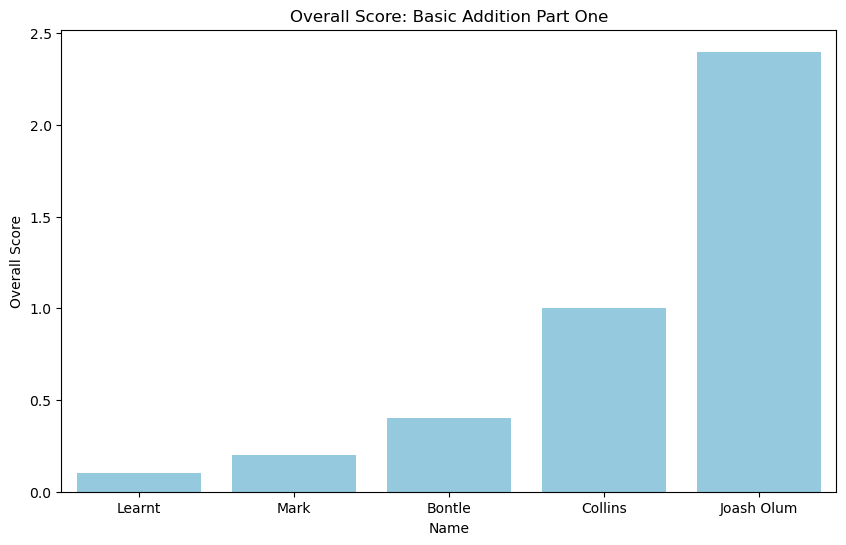

####################################################################################################
   index          assessmentID        assessmentTitle  overallScore firstName
0     87  N6EFBOe2aCeglrUR2qUy  Counting Numbers 1-10      1.000000      Mark
1     88  N6EFBOe2aCeglrUR2qUy  Counting Numbers 1-10      0.000000   Irators
2     89  N6EFBOe2aCeglrUR2qUy  Counting Numbers 1-10      0.000000      Mark
3     90  N6EFBOe2aCeglrUR2qUy  Counting Numbers 1-10      1.800000   Collins
4     92  N6EFBOe2aCeglrUR2qUy  Counting Numbers 1-10      1.000000    Learnt
5     93  N6EFBOe2aCeglrUR2qUy  Counting Numbers 1-10      0.571429      Mark
6     94  N6EFBOe2aCeglrUR2qUy  Counting Numbers 1-10      1.000000     Joash


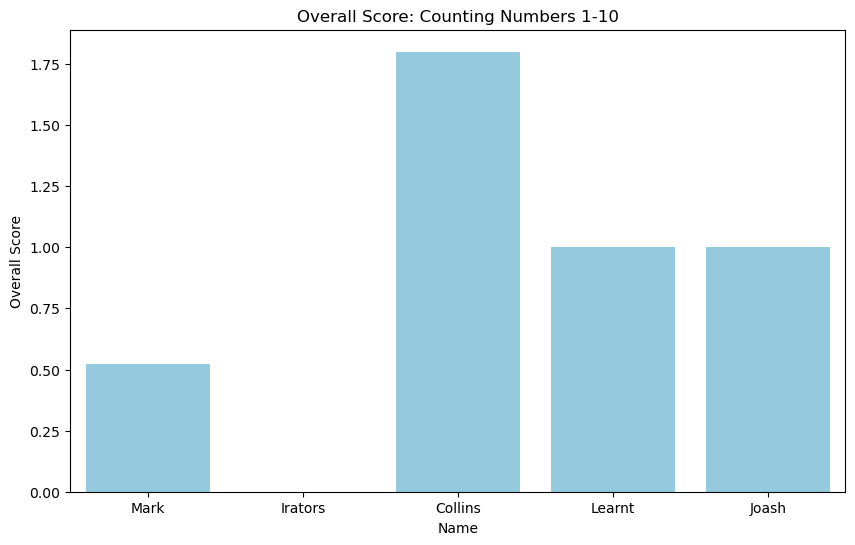

####################################################################################################
   index          assessmentID           assessmentTitle  overallScore  \
0     59  Alzexl3RWXOY46tdgRAH  Counting Numbers 10 - 20           3.6   
1     66  Alzexl3RWXOY46tdgRAH  Counting Numbers 10 - 20           0.2   
2     67  Alzexl3RWXOY46tdgRAH  Counting Numbers 10 - 20           1.0   
3     68  Alzexl3RWXOY46tdgRAH  Counting Numbers 10 - 20           1.0   
4     69  Alzexl3RWXOY46tdgRAH  Counting Numbers 10 - 20           1.0   
5     70  Alzexl3RWXOY46tdgRAH  Counting Numbers 10 - 20           0.8   
6     76  Alzexl3RWXOY46tdgRAH  Counting Numbers 10 - 20           0.8   

    firstName  
0       Keren  
1     Collins  
2      Learnt  
3        Mark  
4    Moripesh  
5         Wei  
6  Joash Olum  


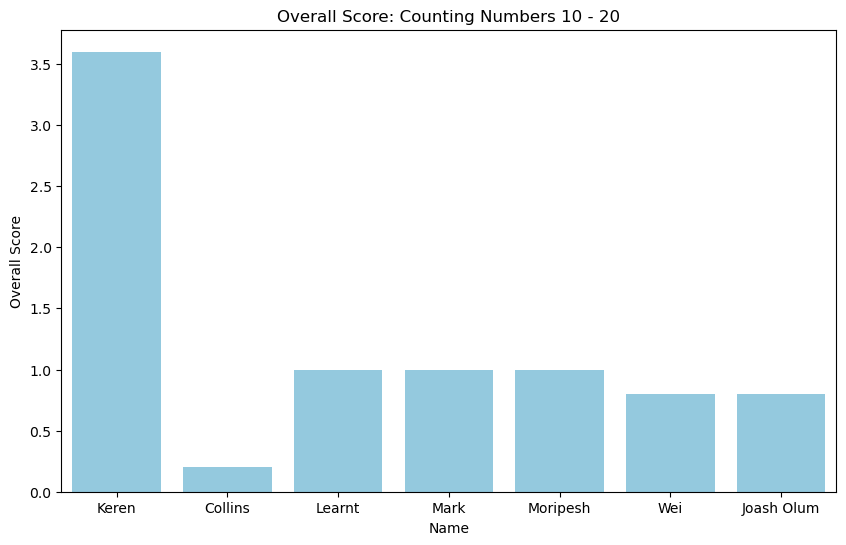

####################################################################################################
   index          assessmentID           assessmentTitle  overallScore  \
0     17  4vTSrHYFVr6UwtYXEwK5  Counting Numbers 20 - 30           0.0   
1     22  4vTSrHYFVr6UwtYXEwK5  Counting Numbers 20 - 30           0.0   
2     27  4vTSrHYFVr6UwtYXEwK5  Counting Numbers 20 - 30           0.0   
3     29  4vTSrHYFVr6UwtYXEwK5  Counting Numbers 20 - 30           0.0   
4     30  4vTSrHYFVr6UwtYXEwK5  Counting Numbers 20 - 30           0.8   
5     32  4vTSrHYFVr6UwtYXEwK5  Counting Numbers 20 - 30           0.0   
6     33  4vTSrHYFVr6UwtYXEwK5  Counting Numbers 20 - 30           0.4   
7     56  4vTSrHYFVr6UwtYXEwK5  Counting Numbers 20 - 30           1.8   
8     57  4vTSrHYFVr6UwtYXEwK5  Counting Numbers 20 - 30           1.0   
9     91  N6EFBOe2aCeglrUR2qUy  Counting Numbers 20 - 30           1.0   

  firstName  
0      Mark  
1   Irators  
2    Learnt  
3      Mark  
4   Collins  


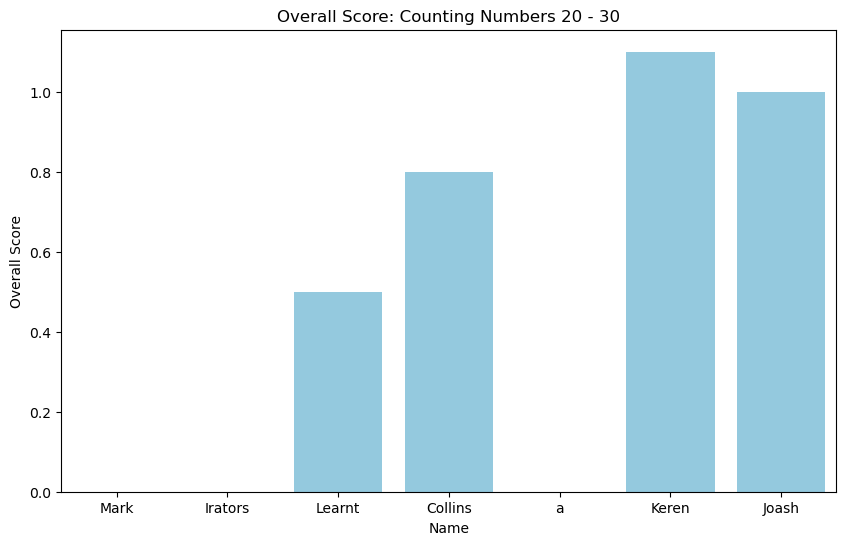

####################################################################################################
   index          assessmentID assessmentTitle  overallScore   firstName
0     13  T8yaianDtBlAaKB0DsJ0  Courtesy Words           0.0      Learnt
1     20  T8yaianDtBlAaKB0DsJ0  Courtesy Words           1.0        Mark
2     75  T8yaianDtBlAaKB0DsJ0  Courtesy Words           0.0  Joash Olum


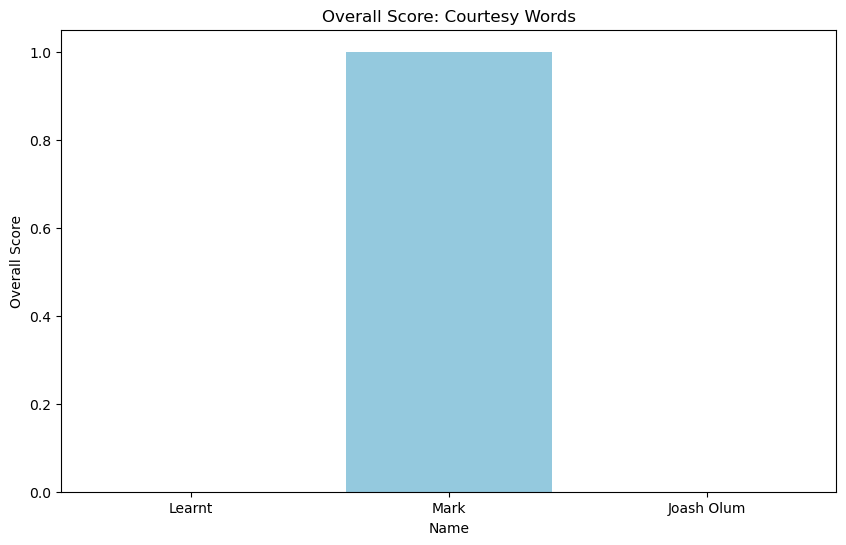

####################################################################################################
   index          assessmentID        assessmentTitle  overallScore  \
0     19  CKf1KK4cNxqU6o5gCTaH  Environmental Studies           0.0   
1     42  CKf1KK4cNxqU6o5gCTaH  Environmental Studies           0.8   
2     43  CKf1KK4cNxqU6o5gCTaH  Environmental Studies           0.4   
3     44  CKf1KK4cNxqU6o5gCTaH  Environmental Studies           0.4   
4     71  CKf1KK4cNxqU6o5gCTaH  Environmental Studies           1.6   

      firstName  
0          Mark  
1        Learnt  
2  Little Jimmy  
3    Joash Olum  
4       Collins  


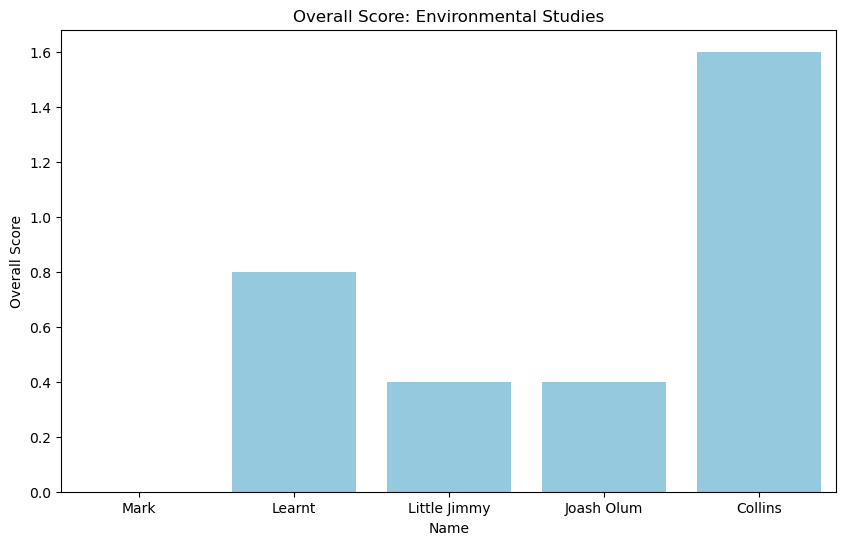

####################################################################################################
   index          assessmentID    assessmentTitle  overallScore   firstName
0     12  8p01Q42Ym2zOf6bzPgcu  Evening Greetings           0.0      Learnt
1     18  8p01Q42Ym2zOf6bzPgcu  Evening Greetings           0.0        Mark
2     23  8p01Q42Ym2zOf6bzPgcu  Evening Greetings           0.0     Irators
3     58  8p01Q42Ym2zOf6bzPgcu  Evening Greetings           2.6       Keren
4     73  8p01Q42Ym2zOf6bzPgcu  Evening Greetings           1.0     Collins
5     74  8p01Q42Ym2zOf6bzPgcu  Evening Greetings           0.0  Joash Olum


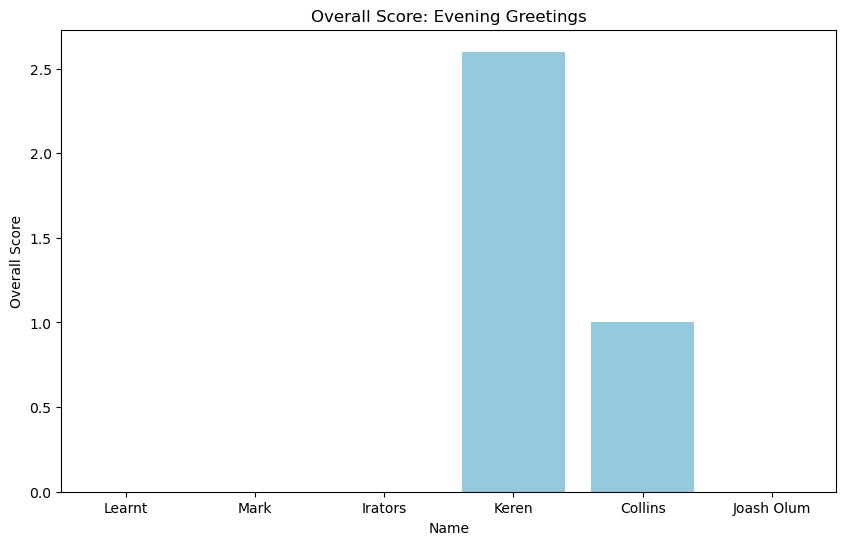

####################################################################################################
   index          assessmentID           assessmentTitle  overallScore  \
0      0  0E7Fgx1qjpJDEPG227TM  Interpreting the weather           0.0   
1     60  VgijRlx7AMI3sCXfmsao  Interpreting the weather           0.0   
2     61  VgijRlx7AMI3sCXfmsao  Interpreting the weather           0.0   
3     62  VgijRlx7AMI3sCXfmsao  Interpreting the weather           1.0   

      firstName  
0  Little Jimmy  
1        Learnt  
2       Collins  
3          Mark  


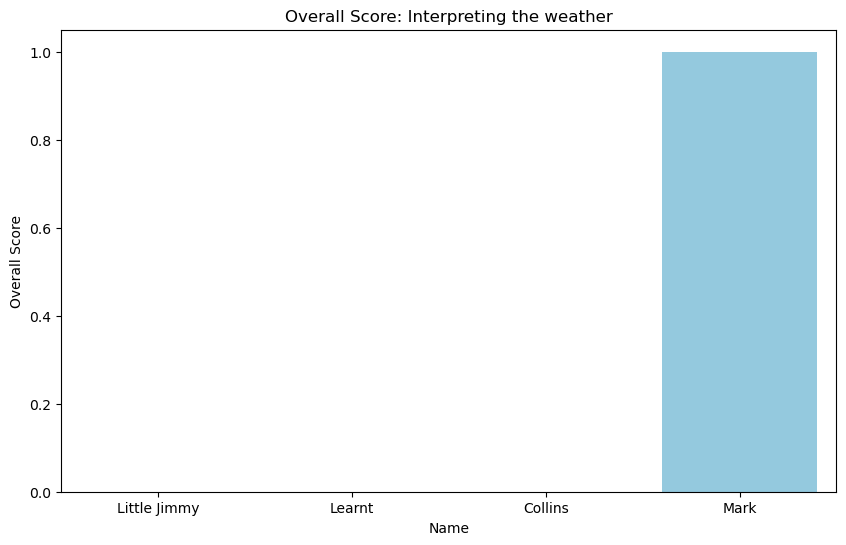

####################################################################################################
    index          assessmentID    assessmentTitle  overallScore firstName
0       2  0E7Fgx1qjpJDEPG227TM  Morning Greetings           0.0   Collins
1       3  e2qxi19gMDjRHzmJ0EuJ  Morning Greetings           1.0    Learnt
2       4  WQIiM5iXz8tqUwyi6n1K  Morning Greetings           0.5      Mark
3      11  0E7Fgx1qjpJDEPG227TM  Morning Greetings           0.0    Learnt
4      14  0E7Fgx1qjpJDEPG227TM  Morning Greetings           0.8   Collins
5      15  0E7Fgx1qjpJDEPG227TM  Morning Greetings           0.0     Stacy
6      16  0E7Fgx1qjpJDEPG227TM  Morning Greetings           1.0      Mark
7      25  0E7Fgx1qjpJDEPG227TM  Morning Greetings           0.0         a
8      26  0E7Fgx1qjpJDEPG227TM  Morning Greetings           0.0    Learnt
9      28  0E7Fgx1qjpJDEPG227TM  Morning Greetings           0.0      Mark
10     49  0E7Fgx1qjpJDEPG227TM  Morning Greetings           0.8   Irators

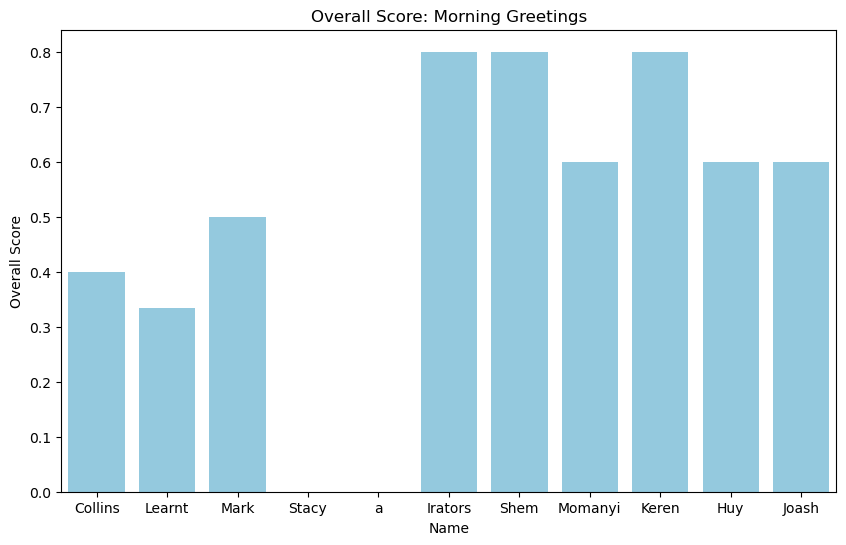

####################################################################################################
   index          assessmentID   assessmentTitle  overallScore firstName
0      5  VSwwChmNMxKf5lg5FFwJ  Our solar system          0.75  Kesuibai
1      6  VSwwChmNMxKf5lg5FFwJ  Our solar system          2.00     Keren
2      7  VSwwChmNMxKf5lg5FFwJ  Our solar system          0.75      Mark
3      8  VSwwChmNMxKf5lg5FFwJ  Our solar system          0.00      Shem
4      9  VSwwChmNMxKf5lg5FFwJ  Our solar system          0.75    Learnt
5     10  VSwwChmNMxKf5lg5FFwJ  Our solar system          0.00   Collins


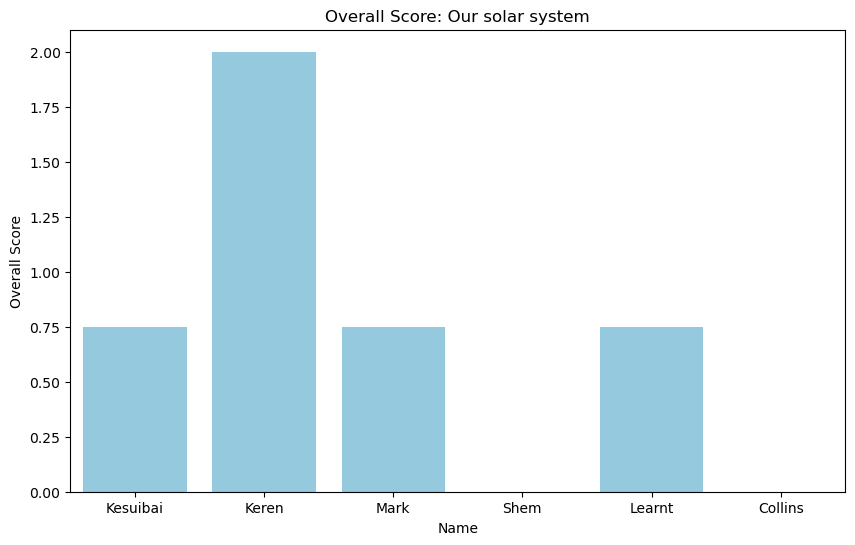

####################################################################################################
   index          assessmentID             assessmentTitle  overallScore  \
0     37  ZGBHYoLGFRwkKkTtaqxP  The Boy and the North Wind           0.2   
1     38  ZGBHYoLGFRwkKkTtaqxP  The Boy and the North Wind           0.8   
2     39  ZGBHYoLGFRwkKkTtaqxP  The Boy and the North Wind           1.0   
3     40  ZGBHYoLGFRwkKkTtaqxP  The Boy and the North Wind           0.4   
4     41  ZGBHYoLGFRwkKkTtaqxP  The Boy and the North Wind           0.6   

  firstName  
0      Mark  
1      Anne  
2     Keren  
3   Collins  
4      Mark  


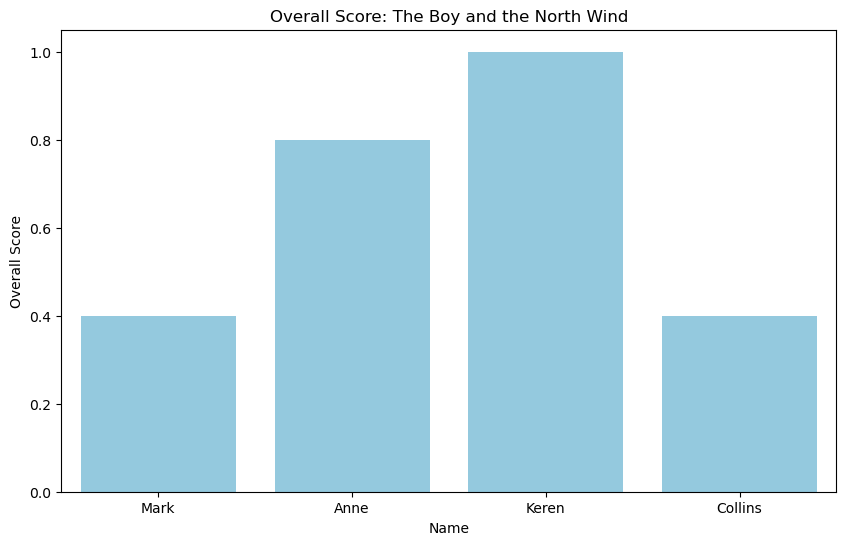

####################################################################################################
 


In [28]:
for assessment_title, group_data in df.groupby('assessmentTitle'):
    filter_data = group_data[['assessmentID', 'assessmentTitle', 'overallScore', 'firstName']].reset_index()
    print(filter_data)
    
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=filter_data, x='firstName', y='overallScore', color='skyblue', ci=None)
    plt.xlabel('Name')
    plt.ylabel('Overall Score')
    plt.title(f'Overall Score: {filter_data["assessmentTitle"][0]}')  # Using the first assessmentTitle for the plot title
    plt.show()
    print('#'*100)
print(" ")

## Some Video are recommended based on Assessment

### Afternoon Greetings
- below are the recommend videos who were got low-score.

  - <a href="https://www.youtube.com/watch?v=Fw0rdSHzWFY" target="_blank">greeting class 1</a>
  - <a href="https://www.youtube.com/watch?v=by1QAoRcc-U" target="_blank">greeting class 2</a>

### Alphabets Lesson 1
- below are the recommend videos who were got low-score.
  
  - <a href="https://www.youtube.com/watch?v=h4FjjPneNw8" target="_blank">Alphabet Lesson 1</a>
  - <a href="https://www.youtube.com/watch?v=drlIUqRYM-w" target="_blank">Alphabet Lesson 2</a>

### Alphabets Lesson 2
- below are the recommend videos who were got low-score.
  
  - <a href="https://www.youtube.com/watch?v=EOX784OXmPs" target="_blank">Alphabet Lesson 1</a>

### Basic Addition Part One
- below are the recommend videos to practice.

  - <a href="https://www.youtube.com/watch?v=mjlsSYLLOSE" target="_blank">Basic Addition</a>
  - <a href="https://www.youtube.com/watch?v=RwnqECUD6SI" target="_blank">Basic Addition</a>

### Counting Numbers 1-10
- below are the recommend videos to practice.

  - <a href="https://www.youtube.com/watch?v=xjnlymFLSdM" target="_blank">Numbers Counting Class 1</a>
  - <a href="https://www.youtube.com/watch?v=GcsjhHhVunI" target="_blank">Numbers Counting Class 2</a>

### Counting Numbers 10-20
- below are the recommend videos to practice.

  - <a href="https://www.youtube.com/watch?v=B-83WJMAjMA" target="_blank">Numbers Counting Class 3</a>

### Counting Numbers 20-30
- below are the recommend videos to practice.

  - <a href="https://www.youtube.com/watch?v=O3Ec23NiFv0" target="_blank">Numbers Counting Class 4</a>

### Morning Greetings
- below are the recommend videos who were got low-score.

  - <a href="https://www.youtube.com/watch?v=Fw0rdSHzWFY" target="_blank">greeting class 1</a>
  - <a href="https://www.youtube.com/watch?v=by1QAoRcc-U" target="_blank">greeting class 2</a>

### Evening Greetings
- below are the recommend videos who were got low-score.

  - <a href="https://www.youtube.com/watch?v=Fw0rdSHzWFY" target="_blank">greeting class 1</a>
  - <a href="https://www.youtube.com/watch?v=by1QAoRcc-U" target="_blank">greeting class 2</a>

### Courtesy Words
- below are the recommend videos who were got low-score.

  - <a href="https://www.youtube.com/watch?v=fzV0vwW6Cho" target="_blank">Courtesy Words class 1</a>

### Our Solar System
- below are the recommend videos who were got low-score.

  - <a href="https://www.youtube.com/watch?v=w36yxLgwUOc" target="_blank">Solar System class 1</a>

### Environmental Studies
- below are the recommend videos who were got low-score.

  - <a href="https://www.youtube.com/watch?v=t13L23RuZvc" target="_blank">Environmental Studies class 1</a>
  - <a href="https://www.youtube.com/watch?v=bRz-bttB56s" target="_blank">Environmental Studies class 1</a>

### Interpreting the weather
- below are the recommend videos who were got low-score.

  - <a href="https://www.youtube.com/watch?v=ZfamR09Jklw" target="_blank">Interpreting the Weather class 1</a>

## Model Building

In [29]:
df

,firstName,lastName,updatedOn,assessmentTitle,assessmentID,totalNumberQuestions,questionsDone,overallScore,GRADE
0,Little Jimmy,Jr.,2023-11-27,Interpreting the weather,0E7Fgx1qjpJDEPG227TM,0,0,0.000000,1
1,Learnt,Africa,2023-08-07,Basic Addition Part One,0E7Fgx1qjpJDEPG227TM,0,0,0.000000,1
2,Collins,Kesuibai,2023-07-06,Morning Greetings,0E7Fgx1qjpJDEPG227TM,0,0,0.000000,1
3,Learnt,Africa,2022-04-22,Morning Greetings,e2qxi19gMDjRHzmJ0EuJ,2,2,1.000000,1
4,Mark,Moriama,2022-04-22,Morning Greetings,WQIiM5iXz8tqUwyi6n1K,2,2,0.500000,1
...,...,...,...,...,...,...,...,...,...
90,Collins,Kesuibai,2022-08-24,Counting Numbers 1-10,N6EFBOe2aCeglrUR2qUy,7,11,1.800000,1
91,Learnt,Africa,2023-12-27,Counting Numbers 20 - 30,N6EFBOe2aCeglrUR2qUy,7,7,1.000000,1
92,Learnt,Africa,2024-05-05,Counting Numbers 1-10,N6EFBOe2aCeglrUR2qUy,7,7,1.000000,1
93,Mark,Moriama,2022-06-20,Counting Numbers 1-10,N6EFBOe2aCeglrUR2qUy,7,7,0.571429,1


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, precision_score, f1_score, recall_score, confusion_matrix, log_loss

### Spliting the Data

In [31]:
X = df.drop('GRADE', axis=1)
y = df['GRADE']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

cat = ["firstName", "lastName", "updatedOn", "assessmentTitle", "assessmentID"]
num = ["totalNumberQuestions", "questionsDone", "overallScore"]

# Separate the splited data into categorical & numerical
X_train_cat = X_train[cat]
X_train_num = X_train[num]
X_test_cat = X_test[cat]
X_test_num = X_test[num]

In [32]:
# Applying StandardScaler on numerical data
scaler = StandardScaler()
X_train_num_transformed = scaler.fit_transform(X_train_num)
X_test_num_transformed = scaler.transform(X_test_num)

# Applying OneHotEncoder on categorical data
encoder = OneHotEncoder(drop="first",sparse_output=False,handle_unknown='ignore')
X_train_cat_transformed = encoder.fit_transform(X_train_cat)
X_test_cat_transformed = encoder.transform(X_test_cat)

In [33]:
# convert the data into dataframe
X_train_num_df = pd.DataFrame(X_train_num_transformed, columns = scaler.get_feature_names_out())
X_test_num_df = pd.DataFrame(X_test_num_transformed, columns = scaler.get_feature_names_out())

X_train_cat_df = pd.DataFrame(X_train_cat_transformed, columns = encoder.get_feature_names_out())
X_test_cat_df = pd.DataFrame(X_test_cat_transformed, columns = encoder.get_feature_names_out())

# concatinate the data
X_train_concat = pd.concat([X_train_num_df, X_train_cat_df], axis=1)
X_test_concat = pd.concat([X_test_num_df, X_test_cat_df], axis=1)


In [34]:
X_train_concat.head()

,totalNumberQuestions,questionsDone,overallScore,firstName_Bontle,firstName_Collins,firstName_Huy,firstName_Irators,firstName_Joash,firstName_Joash Olum,firstName_Keren,...,assessmentID_N6EFBOe2aCeglrUR2qUy,assessmentID_RdcKXGsngbZJGa8ZbTq5,assessmentID_T8yaianDtBlAaKB0DsJ0,assessmentID_VSwwChmNMxKf5lg5FFwJ,assessmentID_WQIiM5iXz8tqUwyi6n1K,assessmentID_ZGBHYoLGFRwkKkTtaqxP,assessmentID_a90v3Uu0x5q34ooXov6F,assessmentID_bLqkCyTYkX01bNFO6Psk,assessmentID_e2qxi19gMDjRHzmJ0EuJ,assessmentID_oyu0dBlMghrjZYeez5Je
0,0.011810,0.019514,0.186591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.011810,0.019514,0.472666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.011810,0.019514,-0.957708,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.688793,-0.970139,-0.957708,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.011810,4.176057,2.761265,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [35]:
X_test_concat.head()

,totalNumberQuestions,questionsDone,overallScore,firstName_Bontle,firstName_Collins,firstName_Huy,firstName_Irators,firstName_Joash,firstName_Joash Olum,firstName_Keren,...,assessmentID_N6EFBOe2aCeglrUR2qUy,assessmentID_RdcKXGsngbZJGa8ZbTq5,assessmentID_T8yaianDtBlAaKB0DsJ0,assessmentID_VSwwChmNMxKf5lg5FFwJ,assessmentID_WQIiM5iXz8tqUwyi6n1K,assessmentID_ZGBHYoLGFRwkKkTtaqxP,assessmentID_a90v3Uu0x5q34ooXov6F,assessmentID_bLqkCyTYkX01bNFO6Psk,assessmentID_e2qxi19gMDjRHzmJ0EuJ,assessmentID_oyu0dBlMghrjZYeez5Je
0,-4.180649,-0.970139,-0.957708,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.011810,0.019514,0.186591,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.011810,1.009167,1.616965,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.011810,0.019514,0.472666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.011810,-0.970139,-0.957708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
from sklearn.utils import all_estimators
from sklearn.base import ClassifierMixin
from sklearn.metrics import accuracy_score

all_classifier = [estimator for estimator in all_estimators() if issubclass(estimator[1], ClassifierMixin) ]
for name, Classifier in all_classifier:
    try:
        clf = Classifier()
        clf.fit(X_train_concat, y_train)
        y_pred_train = clf.predict(X_train_concat)
        y_pred_test = clf.predict(X_test_concat)
        train_score = accuracy_score(y_train, y_pred_train)
        test_score = accuracy_score(y_test, y_pred_test)
        
        print(f"Classifier: {name}")
        print(clf)
        print(f"accuracy of train score: {train_score}")
        print(f"accuracy of test score: {test_score}")
        print("-"*100)
        print(" ")

    except:
        print(f"couldn't initialize mode name")
        print("")

Classifier: AdaBoostClassifier
AdaBoostClassifier()
accuracy of train score: 0.8732394366197183
accuracy of test score: 0.875
----------------------------------------------------------------------------------------------------
 
Classifier: BaggingClassifier
BaggingClassifier()
accuracy of train score: 0.9859154929577465
accuracy of test score: 0.875
----------------------------------------------------------------------------------------------------
 
Classifier: BernoulliNB
BernoulliNB()
accuracy of train score: 0.9014084507042254
accuracy of test score: 0.875
----------------------------------------------------------------------------------------------------
 
Classifier: CalibratedClassifierCV
CalibratedClassifierCV()
accuracy of train score: 0.9859154929577465
accuracy of test score: 0.875
----------------------------------------------------------------------------------------------------
 
couldn't initialize mode name

couldn't initialize mode name

couldn't initialize mode name


### Another process on identifying metrics score using GridSearchCV by using various models

In [37]:
pipelines = {
    'logistic_regression': Pipeline([
        ('scaler', RobustScaler()),
        ('classifier', LogisticRegression())
    ]),
    'sgd_classification': Pipeline([
        ('scaler', RobustScaler()),
        ('classifier', SGDClassifier())
    ]),
    'decision_tree_classification': Pipeline([
        ('scaler', RobustScaler()),
        ('classifier', DecisionTreeClassifier())
    ]),
    'random_forest_classification': Pipeline([
        ('scaler', RobustScaler()),
        ('classifier', RandomForestClassifier())
    ]),
    'svm_classification': Pipeline([
        ('scaler', RobustScaler()),
        ('classifier', SVC())
    ])
}

param_grids = {
    'logistic_regression': [
        {
            'scaler': [RobustScaler()],
            'classifier__C': [0.01, 0.1, 1, 10, 100],
            'classifier__solver': ['liblinear', 'lbfgs']
        }
    ],
    'sgd_classification': [
        {
            'scaler': [RobustScaler()],
            'classifier__alpha': [0.0001, 0.001, 0.01],
            'classifier__loss': ['hinge', 'log', 'modified_huber'],
            'classifier__penalty': ['l1', 'l2']
        }
    ],
    'decision_tree_classification': [
        {
            'scaler': [RobustScaler()],
            'classifier__max_depth': [None, 5, 10, 15],
            'classifier__min_samples_split': [2, 5, 10]
        }
    ],
    'random_forest_classification': [
        {
            'scaler': [RobustScaler()],
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [None, 5, 10],
            'classifier__min_samples_split': [2, 5, 10]
        }
    ],
    'svm_classification': [
        {
            'scaler': [RobustScaler()],
            'classifier__C': [0.01, 0.1, 1, 10, 100],
            'classifier__gamma': [0.0001, 0.001, 0.01, 0.1, 1],
            'classifier__kernel': ['rbf', 'linear']
        }
    ]
}

best_models_classification_accuracy = {}

for algorithm in pipelines.keys():
    print("*"*10, algorithm, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algorithm], 
                               param_grid=param_grids[algorithm], 
                               cv=5, 
                               scoring="f1",  
                               return_train_score=True,
                               verbose=1
                              )
    
    %time grid_search.fit(X_train_concat, y_train)
    
    best_models_classification_accuracy[algorithm] = grid_search.best_estimator_
    
    y_pred_train = grid_search.predict(X_train_concat)
    y_pred_test = grid_search.predict(X_test_concat)
    
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    print('Training Accuracy: ', train_accuracy)
    print('Test Accuracy: ', test_accuracy)
    print('Classification Report:\n', classification_report(y_test, y_pred_test))


********** logistic_regression **********
Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: total: 250 ms
Wall time: 723 ms
Training Accuracy:  0.7887323943661971
Test Accuracy:  0.875
Classification Report:
               precision    recall  f1-score   support

           1       0.88      1.00      0.93        21
           3       0.00      0.00      0.00         3

    accuracy                           0.88        24
   macro avg       0.44      0.50      0.47        24
weighted avg       0.77      0.88      0.82        24

********** sgd_classification **********
Fitting 5 folds for each of 18 candidates, totalling 90 fits
CPU times: total: 62.5 ms
Wall time: 1.04 s
Training Accuracy:  1.0
Test Accuracy:  0.8333333333333334
Classification Report:
               precision    recall  f1-score   support

           1       0.87      0.95      0.91        21
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00       

Logistic Regression model seems to be the best fit based on the test accuracy and balanced precision-recall trade-off. However, it’s essential to consider other factors like interpretability, computational cost, and domain-specific requirements

## Reccomendations

### Video Recommendations
**Content-Based Filtering:** Recommend educational videos based on the topics and concepts students are struggling with or have shown 
interest in.

**Collaborative Filtering:** Recommend videos that similar students found helpful.

### Book Recommendations
**Topic-Based Recommendations:** Suggest books related to the subjects in which students need improvement.

**Level-Based Recommendations:** Recommend books appropriate to the student's current proficiency level.

### Virtual Tutoring
**Personalized Learning Paths:** Based on the analysis, create personalized study plans for each student, focusing on areas needing 
improvement.

**Interactive Learning:** Develop interactive modules or quizzes that help reinforce learning in specific areas.

**Feedback Mechanism:** Provide instant feedback on assessments and suggest improvements or additional resources.

**Adaptive Learning:** Continuously adjust recommendations and tutoring strategies based on the student's progress and feedback.



In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

df = pd.read_excel(r"C:\Users\sivak\Excel_files\Assessment_Data.xlsx")

user_subject_matrix = df.pivot_table(index='firstName', columns='assessmentTitle', values='GRADE')

user_subject_matrix.fillna(0, inplace=True)

student_similarity = cosine_similarity(user_subject_matrix)

# Convert the similarity matrix into a DataFrame
student_similarity_df = pd.DataFrame(student_similarity, index=user_subject_matrix.index, columns=user_subject_matrix.index)

def predict_ratings(user_subject_matrix, student_similarity_df):
    predicted_ratings = np.dot(student_similarity_df, user_subject_matrix)
    sum_of_similarities = np.array([np.abs(student_similarity_df).sum(axis=1)]).T
    predicted_ratings = predicted_ratings / sum_of_similarities
    
    # Return the predicted ratings in a DataFrame
    return pd.DataFrame(predicted_ratings, index=user_subject_matrix.index, columns=user_subject_matrix.columns)

# Predict the ratings for all students on all subjects
predicted_ratings = predict_ratings(user_subject_matrix, student_similarity_df)

def get_top_n_recommendations(predicted_ratings, n=3):
    top_n_recommendations = {}
    
    for student_id in predicted_ratings.index:
        # Sort the subjects by the predicted rating in descending order
        top_subjects = predicted_ratings.loc[student_id].sort_values(ascending=False).head(n)
        top_n_recommendations[student_id] = list(top_subjects.index)
    
    return top_n_recommendations

# Get subject recommendations for each student
top_n = get_top_n_recommendations(predicted_ratings, n=15)

for student_id, subjects in top_n.items():
    print(f" Subject recommendations for student {student_id}:")
    print("*"*50)
    for subject in subjects:
        print(f"  {subject}: predicted rating {predicted_ratings.loc[student_id, subject]:.2f}")
    
    print("-"*50)


ValueError: Input contains NaN.

### Another way to build recommendations

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from keras.optimizers import Adam


df = pd.read_excel(r"C:\Users\sivak\Excel_files\Assessment_Data.xlsx")

# Encode student and subject identifiers
student_encoder = LabelEncoder()
subject_encoder = LabelEncoder()

df['student_encoded'] = student_encoder.fit_transform(df['firstName'])
df['subject_encoded'] = subject_encoder.fit_transform(df['assessmentTitle'])

# Create a user-item interaction matrix
num_students = df['student_encoded'].nunique()
num_subjects = df['subject_encoded'].nunique()

# Prepare training data
X = df[['student_encoded', 'subject_encoded']].values
y = df['GRADE'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def create_model(num_students, num_subjects, embedding_size=8):
    student_input = Input(shape=(1,), name='student_input')
    subject_input = Input(shape=(1,), name='subject_input')

    student_embedding = Embedding(num_students, embedding_size)(student_input)
    subject_embedding = Embedding(num_subjects, embedding_size)(subject_input)

    student_vec = Flatten()(student_embedding)
    subject_vec = Flatten()(subject_embedding)

    # Concatenate student and subject vectors
    concat = Concatenate()([student_vec, subject_vec])

    # Add a hidden layer
    hidden = Dense(128, activation='relu')(concat)
    hidden = Dense(64, activation='relu')(hidden)
    output = Dense(1, activation='linear')(hidden)

    model = Model(inputs=[student_input, subject_input], outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')  # Updated line
    
    return model

# Create and train the model
model = create_model(num_students, num_subjects)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')  # Updated line
model.fit([X_train[:, 0], X_train[:, 1]], y_train, epochs=20, batch_size=32, validation_data=([X_test[:, 0], X_test[:, 1]], y_test))

# Predict ratings for the test set
predicted_ratings = model.predict([X_test[:, 0], X_test[:, 1]])

# Create a DataFrame to hold the predictions
predicted_ratings_df = pd.DataFrame(predicted_ratings, columns=['predicted_rating'])
predicted_ratings_df['student_encoded'] = X_test[:, 0]
predicted_ratings_df['subject_encoded'] = X_test[:, 1]

# Function to recommend top-N subjects for each student
def get_top_n_recommendations(predicted_ratings_df, student_encoder, subject_encoder, n=3):
    top_n_recommendations = {}
    
    # Get the original student and subject names
    predicted_ratings_df['student'] = predicted_ratings_df['student_encoded'].apply(lambda x: student_encoder.inverse_transform([x])[0])
    predicted_ratings_df['subject'] = predicted_ratings_df['subject_encoded'].apply(lambda x: subject_encoder.inverse_transform([x])[0])

    # Loop through each student and find their top-N subject recommendations
    for student_id in predicted_ratings_df['student'].unique():
        student_ratings = predicted_ratings_df[predicted_ratings_df['student'] == student_id]
        top_subjects = student_ratings.sort_values(by='predicted_rating', ascending=False).head(n)
        top_n_recommendations[student_id] = list(top_subjects['subject'])
    
    return top_n_recommendations

# Get subject recommendations for each student
top_n = get_top_n_recommendations(predicted_ratings_df, student_encoder, subject_encoder, n=15)

# Display recommendations for all students
for student_id, subjects in top_n.items():
    print(f"Subject recommendations for student {student_id}:")
    print("*" * 50)
    for subject in subjects:
        # Find the predicted rating for the subject
        matching_row = predicted_ratings_df[(predicted_ratings_df['student'] == student_id) & (predicted_ratings_df['subject'] == subject)]
        if not matching_row.empty:
            predicted_rating = matching_row['predicted_rating'].values[0]
            print(f"  {subject}: predicted rating {predicted_rating:.2f}")
        else:
            print(f"  {subject}: No prediction available")
    
    print("-" * 50)